## This is a Data Cleaning Project.

Firstly, importing the dataset into the df.

In [34]:
import pandas as pd 
df= pd.read_csv('us-shein-appliances-3987.csv')
print(df.head())

                              goods-title-link--jump   
0  1pc Rechargeable Deep Tissue Muscle Handheld M...  \
1                      1pc Portable Hanging Neck Fan   
2  1pc Pink Colored Curved Eyelash Curler False E...   
3  1 Mini Portable Handheld Fan With 2 Aa Batteri...   
4  Wit Water Flosser,Portable Oral Irrigator With...   

                         goods-title-link--jump href       rank-title   
0  https://us.shein.com/1pc-Rechargeable-Deep-Tis...  #1 Best Sellers  \
1  https://us.shein.com/1pc-Portable-Hanging-Neck...  #4 Best Sellers   
2  https://us.shein.com/1pc-Pink-Colored-Curved-E...              NaN   
3  https://us.shein.com/1-Mini-Portable-Handheld-...              NaN   
4  https://us.shein.com/Wit-Water-Flosser-Portabl...  #6 Best Sellers   

                        rank-sub   price discount  selling_proposition   
0                  in Give Gifts   $2.03     -22%                  NaN  \
1  in Top rated in Portable Fans   $6.48     -20%                  NaN   
2 

In [35]:
print(df.columns)
print(df.shape[0])

Index(['goods-title-link--jump', 'goods-title-link--jump href', 'rank-title',
       'rank-sub', 'price', 'discount', 'selling_proposition',
       'goods-title-link'],
      dtype='object')
3986


Now, we visualize the missing value using seaborn and matplotlib. Here, yellow color indicates the abssence of data and puple indicates the non missing value.

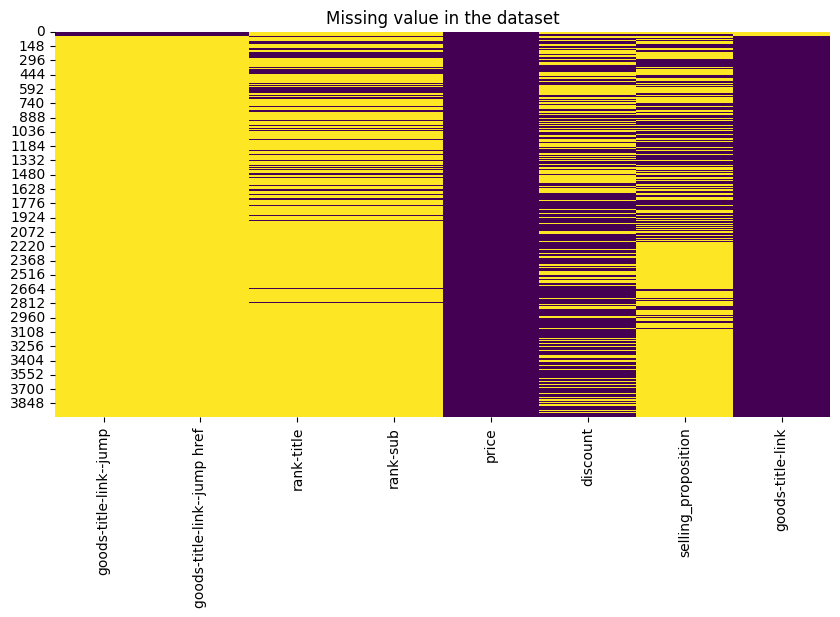

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing value in the dataset')
plt.show()

We can know the statistics of the dataset.

In [37]:
print(df.describe())

                                   goods-title-link--jump   
count                                                  40  \
unique                                                 40   
top     1pc Rechargeable Deep Tissue Muscle Handheld M...   
freq                                                    1   

                              goods-title-link--jump href       rank-title   
count                                                  40              559  \
unique                                                 40               10   
top     https://us.shein.com/1pc-Rechargeable-Deep-Tis...  #4 Best Sellers   
freq                                                    1               63   

              rank-sub  price discount selling_proposition   
count              559   3986     2459                1361  \
unique             124   1512       80                  64   
top     in Hair Dryers  $2.90     -28%   10+ sold recently   
freq                14     35      272                 

Lets count the missing and non-missing values.

In [38]:
print(df.isnull().sum())

goods-title-link--jump         3946
goods-title-link--jump href    3946
rank-title                     3427
rank-sub                       3427
price                             0
discount                       1527
selling_proposition            2625
goods-title-link                 40
dtype: int64


In [39]:
print(df.notna().sum())

goods-title-link--jump           40
goods-title-link--jump href      40
rank-title                      559
rank-sub                        559
price                          3986
discount                       2459
selling_proposition            1361
goods-title-link               3946
dtype: int64


In [40]:
print(len(df["goods-title-link--jump"]))

3986


As we can see, there is 40 not null values in goods-title-link--jump column and 3946 missing values, it is better to drop the column.

In [41]:
df.drop('goods-title-link--jump', axis=1, inplace= True)

In [42]:
print(df.columns)

Index(['goods-title-link--jump href', 'rank-title', 'rank-sub', 'price',
       'discount', 'selling_proposition', 'goods-title-link'],
      dtype='object')


Similarly, we can drop the columns that have more than 50% missing values. We can use the following code to drop the columns that have more than 50% missing values.

In [43]:
df.drop('goods-title-link--jump href', axis=1, inplace= True)

Lets fill all the columns with missing values with the most frequent value.

In [44]:
columns_to_fill = ['rank-title', 'rank-sub', 'price', 'discount', 'selling_proposition', 'goods-title-link']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mode().iloc[0])


Now we can see that dataframe has no missing value. 

In [45]:
print(df.isnull().sum())

rank-title             0
rank-sub               0
price                  0
discount               0
selling_proposition    0
goods-title-link       0
dtype: int64


In [46]:
# Save the cleaned DataFrame to a CSV file
output_file_path = 'cleaned_data.csv'
df.to_csv(output_file_path, index=False)  # index=False prevents pandas from writing row indices

print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to cleaned_data.csv


In [47]:
df2= pd.read_csv('cleaned_data.csv')

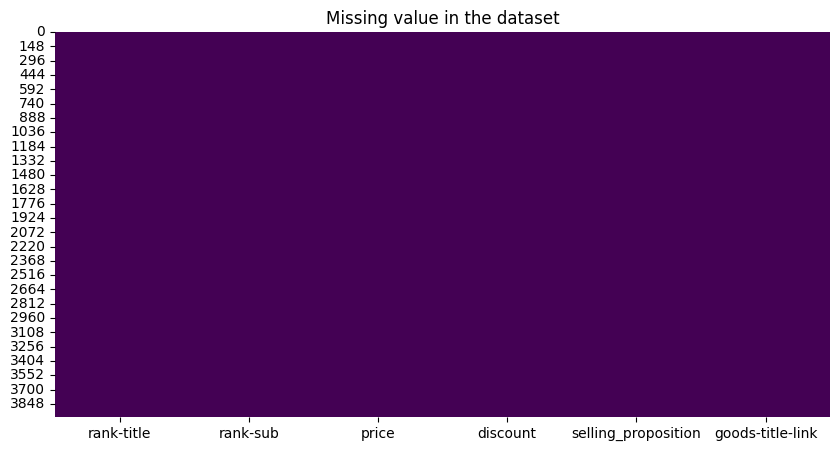

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing value in the dataset')
plt.show()